In [1]:
import numpy as np
import matplotlib.pyplot as plt
from planes import RandomProjectionForestOld
from projections import RandomProjectionForest
from iforest import IsolationForest
from sklearn import datasets

%matplotlib inline

In [2]:
n = 1000
contamination = 0.025
n_anomalies = int(n * contamination)
p = 2


# Parameters for each classifier
N_ESTIMATORS = 100
SCORE_AT = 90.0

mean = np.array([0, 0])

# cov = np.array([
#     [  3.40, -2.75, -2.00],
#     [ -2.75,  5.50,  1.50],
#     [ -2.00,  1.50,  1.25]
# ])

# The desired covariance matrix.
cov = np.array([
    [10.14159, -11.75],
    [-10.0, 12.50]
])

cov_2 = np.array([
    [12.50, 10.0],
    [11.75, 10.14159]
])


offset = 50
cov_anon = np.array([
    [ 10.14159, 0.0],
    [ 0, 15.14159]
])
mean_anon = [0, 0]
is_anomaly = np.random.choice(n, size=n_anomalies, replace=False)


# X, y = datasets.make_moons(n_samples=n, noise=0.02)
# X = offset * X

X = np.random.multivariate_normal(mean=[-20, -10],  cov=cov, size=(int(n/2),))
X = np.row_stack([X, np.random.multivariate_normal(mean=[20, 10], cov=cov_2, size=(int(n/2),))])

X[is_anomaly] = np.random.multivariate_normal(mean=mean_anon, cov=cov_anon, size=(is_anomaly.shape[0]))

# noisy_circles = datasets.make_circles(n_samples=n, factor=0.1, noise=0.1)

# X[np.where(y == 0)] = 10.0 * X[np.where(y==0)]

xx, yy = np.meshgrid(np.linspace(int(np.min(X[:, 0]))-5.0, int(np.max(X[:, 0]))+5.0, 100), 
                     np.linspace(int(np.min(X[:, 1]))-5.0, int(np.max(X[:, 1]))+5.0, 100))

# X_non = X[np.where(y == 1)]
# X_anon = X[np.where(y == 0)]
# X_anon = X_anon[np.random.choice(X_anon.shape[0], 25, replace=False), :]
# X = np.row_stack([X_non, X_anon])
# y = np.zeros(shape=(n,))
# y[is_anomaly] = 1.0

In [3]:
# X_non = X[y == 0]
# X_ano = X[y == 1]

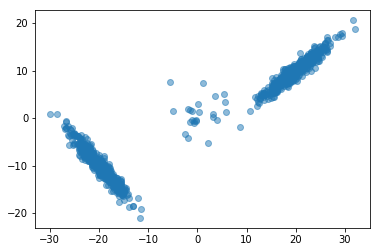

In [4]:
# plt.scatter(X_non[:, 0], X_non[:, 1], c='b', alpha=0.5, marker='o')
# plt.scatter(X_ano[:, 0], X_ano[:, 1], c='r', alpha=0.5, marker='x')
# plt.scatter(X_non[:, 0], X_non[:, 1], alpha=0.5)
# plt.scatter(X_anon[:, 0], X_anon[:, 1], alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)

plt.show()

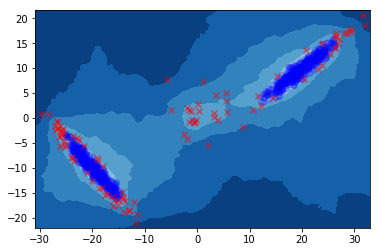

In [5]:
rhp = RandomProjectionForestOld(n_estimators=N_ESTIMATORS).fit(X)

y_pred = rhp.predict(X, score_at=SCORE_AT)

X_non_pred = X[y_pred == 0]
X_ano_pred = X[y_pred == 1]

Z = 1 - rhp.decision_function(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

plt.scatter(X_non_pred[:, 0], X_non_pred[:, 1], c='b', alpha=0.2, marker='o')
plt.scatter(X_ano_pred[:, 0], X_ano_pred[:, 1], c='r', alpha=0.5, marker='x')
plt.xlim([np.min(X[:, 0])-1.0, np.max(X[:, 0])+1.0])
plt.ylim([np.min(X[:, 1])-1.0, np.max(X[:, 1])+1.0])
plt.show()

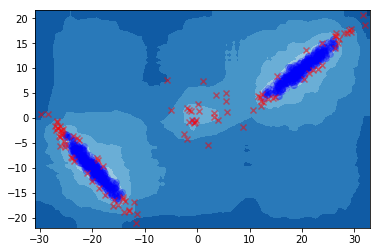

In [6]:
rcf = IsolationForest(n_estimators=N_ESTIMATORS, method='rcf').fit(X)

y_pred = rcf.predict(X, score_at=SCORE_AT)

X_non_pred = X[y_pred == 0]
X_ano_pred = X[y_pred == 1]

Z = 1 - rcf.decision_function(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

plt.scatter(X_non_pred[:, 0], X_non_pred[:, 1], c='b', alpha=0.2, marker='o')
plt.scatter(X_ano_pred[:, 0], X_ano_pred[:, 1], c='r', alpha=0.5, marker='x')
plt.xlim([np.min(X[:, 0])-1.0, np.max(X[:, 0])+1.0])
plt.ylim([np.min(X[:, 1])-1.0, np.max(X[:, 1])+1.0])
plt.show()

In [7]:
ignore_me = """
iforest = IsolationForest(n_estimators=N_ESTIMATORS).fit(X)

y_pred = iforest.predict(X, score_at=SCORE_AT)

X_non_pred = X[y_pred == 0]
X_ano_pred = X[y_pred == 1]

Z = 1 - iforest.decision_function(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

plt.scatter(X_non_pred[:, 0], X_non_pred[:, 1], c='b', alpha=0.2, marker='o')
plt.scatter(X_ano_pred[:, 0], X_ano_pred[:, 1], c='r', alpha=0.5, marker='x')
plt.xlim([np.min(X[:, 0])-1.0, np.max(X[:, 0])+1.0])
plt.ylim([np.min(X[:, 1])-1.0, np.max(X[:, 1])+1.0])
plt.show()
"""

In [8]:
depths_rhp, y_pred_rhp = rhp.get_depths(X), rhp.predict(X, score_at=SCORE_AT)
depths_rcf, y_pred_rcf = rcf.get_depths(X), rcf.predict(X, score_at=SCORE_AT)

anom_rhp = np.mean(depths_rhp[np.where(y_pred_rhp == 1)])
nona_rhp = np.mean(depths_rhp[np.where(y_pred_rhp == 0)])

anom_rcf = np.mean(depths_rcf[np.where(y_pred_rcf == 1)])
nona_rcf = np.mean(depths_rcf[np.where(y_pred_rcf == 0)])

In [9]:
print(f"anom/non-anom for rhp: {anom_rhp} / {nona_rhp}")
print(f"anom/non-anom for rcf: {anom_rcf} / {nona_rcf}")

anom/non-anom for rhp: 11.312200000000002 / 17.581677777777777
anom/non-anom for rcf: 11.081599999999998 / 17.013966666666665


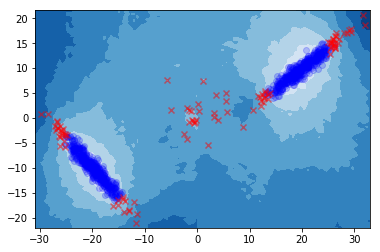

In [10]:
rhp = RandomProjectionForest(n_estimators=N_ESTIMATORS, method='rcf').fit(X)

y_pred = rhp.predict(X, score_at=SCORE_AT)

X_non_pred = X[y_pred == 0]
X_ano_pred = X[y_pred == 1]

Z = 1 - rhp.decision_function(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

plt.scatter(X_non_pred[:, 0], X_non_pred[:, 1], c='b', alpha=0.2, marker='o')
plt.scatter(X_ano_pred[:, 0], X_ano_pred[:, 1], c='r', alpha=0.5, marker='x')
plt.xlim([np.min(X[:, 0])-1.0, np.max(X[:, 0])+1.0])
plt.ylim([np.min(X[:, 1])-1.0, np.max(X[:, 1])+1.0])
plt.show()